In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression as LR  # 线性回归
from sklearn.model_selection import train_test_split  # 划分训练测试集
from sklearn.cluster import KMeans


In [58]:
# 所有表格的结构
# 1. 读取数据
# acs_5yr = pd.read_csv('./acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
# all_comm = pd.read_csv('./all_commodities.csv')
# all_stock = pd.read_csv('./all_stock_and_etfs.csv')
# storage = pd.read_csv('./Meat_Stats_Cold_Storage.csv')
# production = pd.read_csv('./Meat_Stats_Meat_Production.csv')
# counts = pd.read_csv('./Meat_Stats_Slaughter_Counts.csv')
# Meat_weights = pd.read_csv('./Meat_Stats_Slaughter_Weights.csv')
# nutrition = pd.read_csv('./Nutrition_Physical_Activity_and_Obesity_Data.csv')
# stock_des = pd.read_csv('./stock_descriptions.csv')
# tables = [acs_5yr, all_comm, all_stock, storage, production, counts, weights, nutrition, stock_des]
# acs_5yr['Label (Grouping)']

In [3]:
data = pd.read_csv("./adult_income_obesity.csv")

In [42]:
data
data = data.dropna(subset=['Median household income (dollars)'],axis = 0)

slope = 0.7502659039411876  intercept = 0.37670138220163807 coef = 0.22027086347698102
slope = 0.6018053580218911  intercept = 0.2878368347654187 coef = 0.19718148925729356
slope = 1.1165074787852602  intercept = 0.2894819208317111 coef = 0.18636772757199185
slope = 0.991911814609584  intercept = 0.3726198397390242 coef = 0.2917742655393997
slope = 1.8204409356086375  intercept = 0.3358490625155379 coef = 0.30502037253219166
slope = 1.8995939576954468  intercept = 0.31676362296117594 coef = 0.27793343022823586
slope = 1.8135118842215485  intercept = 0.24947288345337676 coef = 0.17550799859195026
slope = 1.6075301489909466  intercept = 0.2645408106762773 coef = 0.19713421043495796
slope = 2.9529205025698024  intercept = 0.31128287723575493 coef = 0.3386757092914851
slope = 1.6207744436750193  intercept = 0.3945811076739465 coef = 0.2830260221116626
slope = 2.882629603283539  intercept = 0.3629268598869989 coef = 0.35055274808857306
slope = -0.30129351021040157  intercept = 0.28674349438

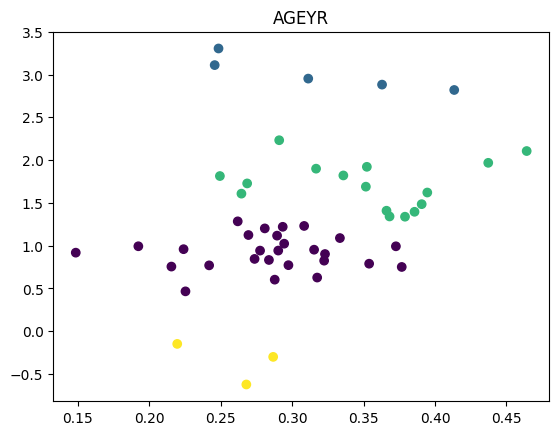

slope = 0.907558203887568  intercept = 0.40143133723617697 coef = 0.34514783250581815
slope = 0.9673511346477367  intercept = 0.3170032326489596 coef = 0.44192238389403915
slope = 1.358329008910852  intercept = 0.3057065344136667 coef = 0.34733971578533956
slope = 0.942543297324738  intercept = 0.3753877504072567 coef = 0.4770684184588936
slope = 1.9256522923299102  intercept = 0.34999628618527606 coef = 0.49795688355815737
slope = 2.2483271787341086  intercept = 0.328156935383972 coef = 0.5171596731045335
slope = 1.5609553154234488  intercept = 0.2573402932247061 coef = 0.23858098861248236
slope = 1.5375813623435122  intercept = 0.2786011966182526 coef = 0.309060895446034
slope = 3.200966384880603  intercept = 0.31252499684366275 coef = 0.5596752577541123
slope = 1.792561752652085  intercept = 0.4119057638601143 coef = 0.5658631242634368
slope = 2.8194943801675802  intercept = 0.36851961795443 coef = 0.6012369111155519
slope = -0.6546063946021263  intercept = 0.3757329939351407 coef =

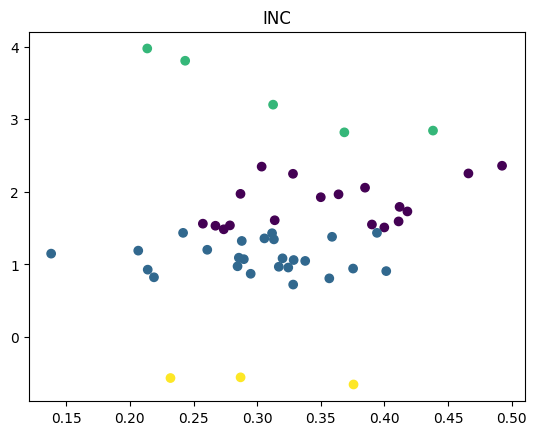

slope = 0.6000650562903815  intercept = 0.3598364895079377 coef = 0.24471648578195093
slope = 0.6895942702722057  intercept = 0.30348489231651676 coef = 0.2737700656508207
slope = 1.371133763147965  intercept = 0.29548348505658584 coef = 0.31099880256062834
slope = 0.9570542700544168  intercept = 0.37294839845090905 coef = 0.3463258110610647
slope = 1.62299425628425  intercept = 0.3401288903119988 coef = 0.45641748012276845
slope = 1.915728395986624  intercept = 0.323279933164562 coef = 0.4667416646157022
slope = 1.6617801667285574  intercept = 0.25475966600437366 coef = 0.21612480215248328
slope = 1.3273144334085016  intercept = 0.2797769932930127 coef = 0.2847458623939616
slope = 2.787054816590139  intercept = 0.31147939899486116 coef = 0.5366505260591676
slope = 1.6120373532523058  intercept = 0.39931838372668366 coef = 0.5180086924462829
slope = 2.749130575523388  intercept = 0.36063933802569714 coef = 0.7036079041521791
slope = -0.4049859253364103  intercept = 0.3509293721956236 c

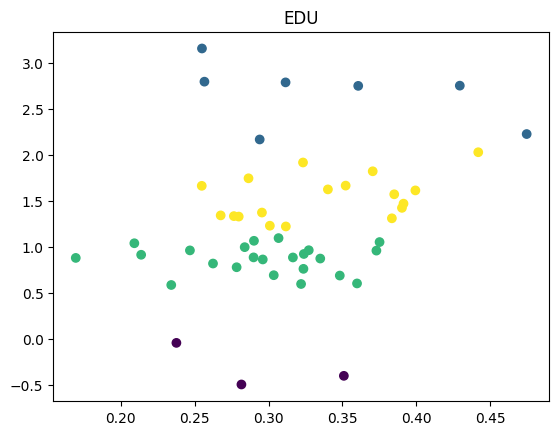

slope = 0.7136565770575354  intercept = 0.37539776726453083 coef = 0.6048997441183557
slope = 0.5706045361025278  intercept = 0.292382005336181 coef = 0.8119958190156434
slope = 1.1111608424378216  intercept = 0.2956347771115997 coef = 0.8498527036462171
slope = 0.9452137222377662  intercept = 0.37099730153939714 coef = 0.7366000741334804
slope = 1.7467188080331237  intercept = 0.3408636709332913 coef = 0.7801446016235619
slope = 1.8308077316990827  intercept = 0.3204400812939685 coef = 0.7966580101897588
slope = 1.602831896866453  intercept = 0.2539838441732818 coef = 0.4375349996467732
slope = 1.4437362103876057  intercept = 0.27583678721628047 coef = 0.5655535062546049
slope = 2.8125728585315595  intercept = 0.31354905492034757 coef = 0.814014932049453
slope = 1.6008642380673215  intercept = 0.3968584148800872 coef = 0.8623946921351187
slope = 2.7365721806479644  intercept = 0.36638072482730427 coef = 0.9750179263473162
slope = -0.23744082378034434  intercept = 0.26952651258748855 c

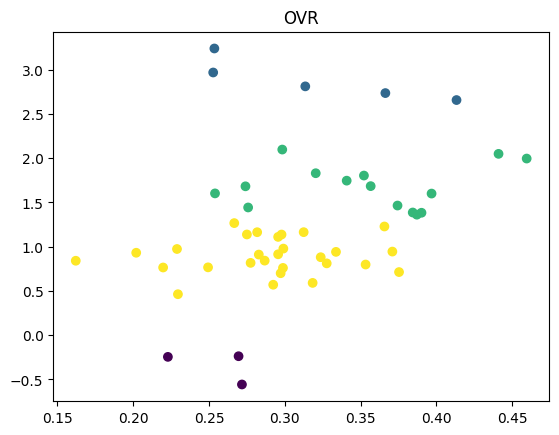

slope = 0.8055961191390364  intercept = 0.3890956179265632 coef = 0.23779047344631302
slope = 0.7627076057891963  intercept = 0.3115336953052536 coef = 0.1539897976420667
slope = 1.001611697806981  intercept = 0.27713576813300606 coef = 0.10283802247193168
slope = 1.2236037674678915  intercept = 0.4225358678845417 coef = 0.32472221672103885
slope = 1.655384332418708  intercept = 0.3291442639548883 coef = 0.1840486550488238
slope = 1.2256172355425388  intercept = 0.3336666965534811 coef = 0.1262285459860349
slope = 4.258704881035155  intercept = 0.1882485599577008 coef = 0.30841842096870753
slope = 1.8325112773904266  intercept = 0.27218711864048595 coef = 0.21706965287593194
slope = 3.832469327769416  intercept = 0.29568498600335247 coef = 0.2831971884497264
slope = 1.0089304439698124  intercept = 0.3675808300486534 coef = 0.1275974897492721
slope = 2.7979221688359233  intercept = 0.3878009291852554 coef = 0.4735079802265986
slope = -0.228523764786112  intercept = 0.23751122291461274 c

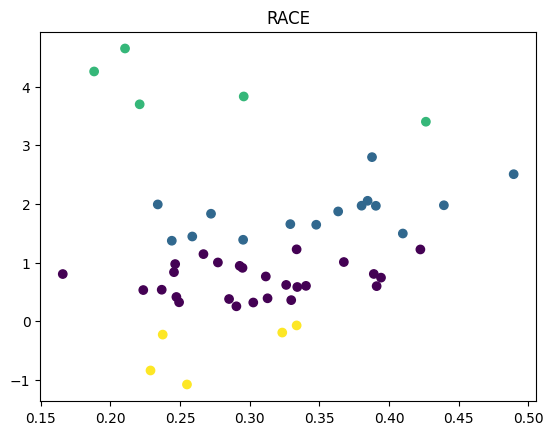

slope = 0.7208432807413734  intercept = 0.3759976352997506 coef = 0.5471472242054455
slope = 0.5817808277302051  intercept = 0.29245786198262685 coef = 0.722403482879588
slope = 1.1223701605284673  intercept = 0.29532235435233656 coef = 0.7746911475066385
slope = 0.9436769693507986  intercept = 0.3707407495196674 coef = 0.6909478113941155
slope = 1.7503198335064902  intercept = 0.340924298091189 coef = 0.7353501272716897
slope = 1.8347934812358353  intercept = 0.3203801421457908 coef = 0.7532821676328089
slope = 1.6333106340656491  intercept = 0.2533035451564898 coef = 0.4289017283912615
slope = 1.4484789701792633  intercept = 0.2757120781082685 coef = 0.48685275654916516
slope = 2.8208278373368194  intercept = 0.3135268712396909 coef = 0.7600560861769515
slope = 1.5941223814522238  intercept = 0.3965848238955715 coef = 0.8083465261900881
slope = 2.745206292871667  intercept = 0.36644133333335754 coef = 0.9062675865430421
slope = -0.2439582145880561  intercept = 0.26915182263398063 coe

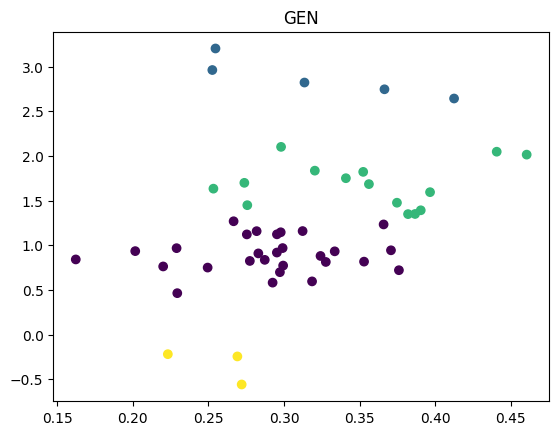

In [45]:
for id in data['adult_StratificationCategoryId1'].unique():
    beta_0, beta_1 = [], []
    data_id = data[data['adult_StratificationCategoryId1'] == id]
    for state in data_id["LocationDesc"].unique():
        if state == "National":
            continue
        # print(state)
        state_data = data_id[data_id["LocationDesc"] == state]
        x = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)
        sub = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)).mean()
        x = x - sub
        # print(sub)
        y = state_data['adult_obesity_Value']/100
        reg = LR().fit(x.values.reshape(-1, 1), y)
        beta_0.append(reg.intercept_)
        beta_1.append(reg.coef_[0])
        print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef =', np.corrcoef(x, y)[0, 1])
        # print()
    k_means = KMeans(n_clusters=4, random_state=0, max_iter=1000).fit(np.array([beta_0, beta_1]).T)
    plt.scatter(beta_0, beta_1, c=k_means.labels_)
    plt.title(id)
    plt.show()

In [35]:
x.mean()

-1.850371707708594e-17

In [13]:
data

,Year,adult_obesity_Value,adult_Income,adult_StratificationCategoryId1,adult_StratificationID1,Mean household income (dollars),Median household income (dollars),LocationDesc
0,2011,29.3,NaN,AGEYR,AGEYR65PLUS,"84,767","69,014",Alaska
1,2011,22.7,Data not reported,INC,INCNR,"84,767","69,014",Alaska
2,2011,19.8,NaN,AGEYR,AGEYR1824,"84,767","69,014",Alaska
3,2011,22.1,NaN,EDU,EDUCOGRAD,"84,767","69,014",Alaska
4,2011,29.5,NaN,AGEYR,AGEYR3544,"84,767","69,014",Alaska
...,...,...,...,...,...,...,...,...
15831,2022,35.7,NaN,EDU,EDUHSGRAD,NaN,NaN,National
15832,2022,33.7,NaN,RACE,RACE2PLUS,NaN,NaN,National
15833,2022,29.5,Data not reported,INC,INCNR,NaN,NaN,National
15834,2022,38.4,"$15,000 - $24,999",INC,INC1525,NaN,NaN,National


slope = -0.538993208499493  intercept = 0.6332615683824867 coef01 = 0.5471472242054455 coef02= 0.6396771932328588 coef12= 0.9353599147720381
slope = 0.12283054069071705  intercept = 0.0538650553889643 coef01 = 0.7224034828795882 coef02= 0.769845512827203 coef12= 0.9011385194272563
slope = 0.5019421631727088  intercept = -0.45460515774749316 coef01 = 0.7746911475066385 coef02= 0.8220144951263961 coef12= 0.7724280025092563
slope = -1.7794326937291436  intercept = 1.9349306644961555 coef01 = 0.6909478113941155 coef02= 0.8346433617266996 coef12= 0.9575504623230933
slope = 0.36820656283065206  intercept = -0.3695689136258335 coef01 = 0.7353501272716897 coef02= 0.8989583543439722 coef12= 0.7402062968778931
slope = 0.6426790623129989  intercept = -0.6953354789602739 coef01 = 0.7532821676328089 coef02= 0.8710474292114818 coef12= 0.7180790405228692
slope = 1.0557548217363184  intercept = -1.3780197493554678 coef01 = 0.4289017283912615 coef02= 0.7964111013119609 coef12= 0.20507439842484865
slope

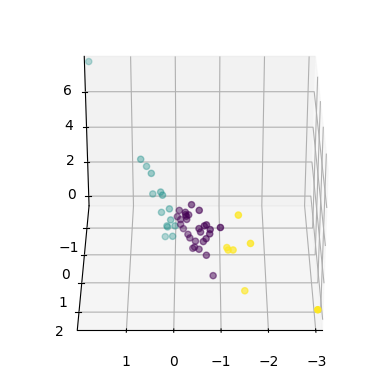

In [31]:
# for id in data['adult_StratificationCategoryId1'].unique():
beta_0, beta_1,beta_2 = [], [],[]
# data_id = data[data['adult_StratificationCategoryId1'] == id]
for state in data["LocationDesc"].unique():
    if state == "National":
        continue
    # print(state)
    state_data = data_id[data_id["LocationDesc"] == state]
    x1 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)
    x2 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int)
    x = pd.DataFrame({'x1':x1.values,'x2':x2.values})
    y = state_data['adult_obesity_Value']/100
    reg = LR().fit(x.values.reshape(-1, 2), y)
    beta_0.append(reg.intercept_)
    beta_1.append(reg.coef_[0])
    beta_2.append(reg.coef_[1])
    print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef01 =', np.corrcoef(x.x1, y)[0, 1],'coef02=',np.corrcoef(x.x2,y)[0,1], 'coef12=',np.corrcoef(x.x1,x.x2)[0,1])
    # print()
k_means = KMeans(n_clusters=3, random_state=0, max_iter=10000).fit(np.array([beta_0, beta_1,beta_2]).T)

from mpl_toolkits.mplot3d import Axes3D
# 假设你有beta_0, beta_1, beta_2这三个特征列表
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta_0, beta_1, beta_2,c=k_means.labels_)
ax.set_xlim([min(beta_0), max(beta_0)])
ax.set_ylim([min(beta_1), max(beta_1)])
ax.set_zlim([min(beta_2), max(beta_2)])
ax.view_init(elev=30, azim=90)
plt.show()

In [23]:
from scipy.spatial.distance import pdist, squareform

def is_coplanar(points, tolerance=10e-3):
    distances = pdist(points, metric='euclidean')
    gram_matrix = squareform(distances) ** 2
    determinant = np.linalg.det(gram_matrix)
    return abs(determinant) < tolerance

In [24]:
is_coplanar([1, 2],[] beta_2])

False